In [5]:
## import the Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheet_csv_url = "https://docs.google.com/spreadsheets/d/1MTnRFZvwCDI1lnrKsQXau-zqcPzDpkg_wsnkP0wkcaA/export?format=csv&gid=0"
df = pd.read_csv(sheet_csv_url)
df = pd.read_csv(sheet_csv_url, skiprows=3)
df.head()

,Unnamed: 0,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaN,11 Sep to 15 Sep,1191603,1189884,28,1770702,1.485983167,0,0,1.001444679,42557.25,0.004275535714
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Daily Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT


In [3]:
# Read the file first to find where "Daily Data" starts
raw_df = pd.read_csv(sheet_csv_url, header=None)

# Find the index of the row containing "Daily Data"
start_idx = raw_df[raw_df.apply(lambda row: row.astype(str).str.contains("Daily Data", case=False).any(), axis=1)].index[0]

# Now read again, skipping everything up to that point + 1 (to skip the header row)
df = pd.read_csv(sheet_csv_url, skiprows=start_idx+1)

# Drop any fully empty rows
df = df.dropna(how="all")

# Reset index
df = df.reset_index(drop=True)

print(df.head())


   Unnamed: 0                Date unique_idfas unique_ips unique_uas  \
0         NaN  2025-09-11 0:00:00        93345      93340         22   
1         NaN  2025-09-12 0:00:00       515646     515307         25   
2         NaN  2025-09-13 0:00:00       406993     406729         25   
3         NaN  2025-09-14 0:00:00       400917     400668         26   
4         NaN  2025-09-15 0:00:00        76526      76519         21   

  total_requests requests_per_idfa impressions impressions_per_idfa  \
0          99280       1.063581338           0                    0   
1         649515       1.259614154           0                    0   
2         473346       1.163032288           0                    0   
3         467152       1.165208759           0                    0   
4          81409       1.063808379           0                    0   

  idfa_ip_ratio idfa_ua_ratio             IVT  
0   1.000053568   4242.954545       0.0034563  
1    1.00065786      20625.84  0.00340854166

In [4]:
# Convert numeric columns from strings to numbers
num_cols = [
    'unique_idfas', 'unique_ips', 'unique_uas', 'total_requests',
    'requests_per_idfa', 'impressions', 'impressions_per_idfa',
    'idfa_ip_ratio', 'idfa_ua_ratio', 'IVT'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop empty rows
df = df.dropna(subset=['Date'])

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 90
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            0 non-null      float64       
 1   Date                  89 non-null     datetime64[ns]
 2   unique_idfas          89 non-null     float64       
 3   unique_ips            89 non-null     float64       
 4   unique_uas            89 non-null     float64       
 5   total_requests        89 non-null     float64       
 6   requests_per_idfa     89 non-null     float64       
 7   impressions           89 non-null     float64       
 8   impressions_per_idfa  89 non-null     float64       
 9   idfa_ip_ratio         89 non-null     float64       
 10  idfa_ua_ratio         89 non-null     float64       
 11  IVT                   89 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 9.0 KB
None


,Unnamed: 0,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaN,2025-09-11,93345.0,93340.0,22.0,99280.0,1.063581,0.0,0.0,1.000054,4242.954545,0.003456
1,NaN,2025-09-12,515646.0,515307.0,25.0,649515.0,1.259614,0.0,0.0,1.000658,20625.840000,0.003409
2,NaN,2025-09-13,406993.0,406729.0,25.0,473346.0,1.163032,0.0,0.0,1.000649,16279.720000,0.006033
3,NaN,2025-09-14,400917.0,400668.0,26.0,467152.0,1.165209,0.0,0.0,1.000621,15419.884620,0.003836
4,NaN,2025-09-15,76526.0,76519.0,21.0,81409.0,1.063808,0.0,0.0,1.000091,3644.095238,0.002968


**Graph Ploting Using Matplotlib & Seaborn**

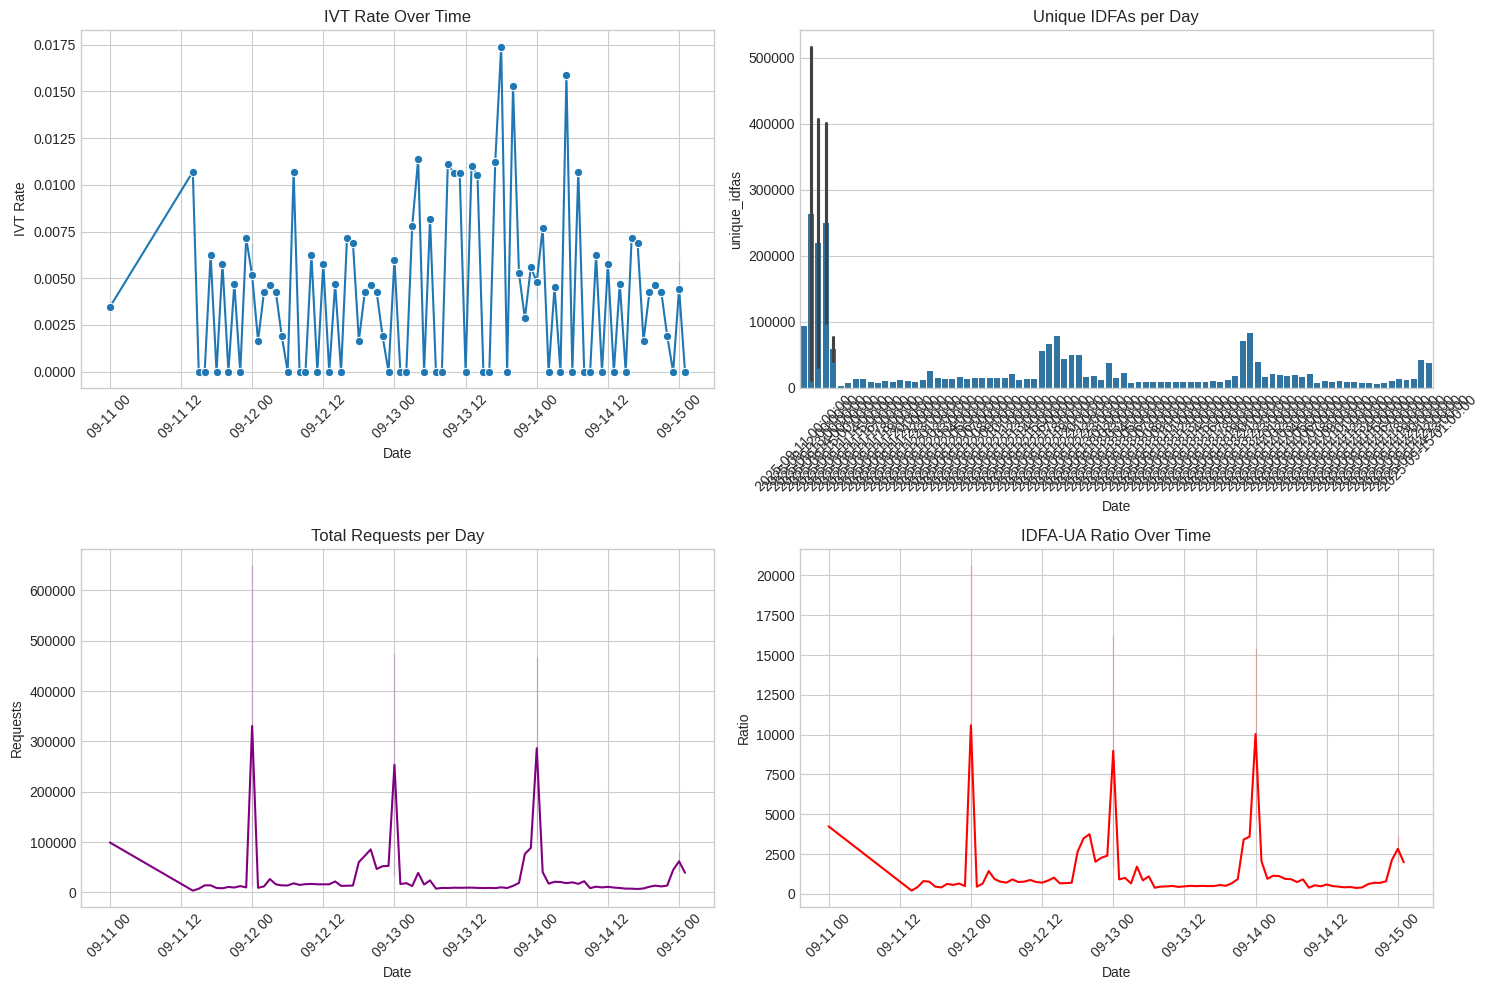

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 10))

# IVT over time
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Date', y='IVT', marker='o')
plt.title("IVT Rate Over Time")
plt.ylabel("IVT Rate")
plt.xticks(rotation=45)

# Unique IDFAs vs Requests
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Date', y='unique_idfas')
plt.title("Unique IDFAs per Day")
plt.xticks(rotation=45)

# Total Requests trend
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x='Date', y='total_requests', color='purple')
plt.title("Total Requests per Day")
plt.ylabel("Requests")
plt.xticks(rotation=45)

# IDFA–UA Ratio trend
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Date', y='idfa_ua_ratio', color='red')
plt.title("IDFA-UA Ratio Over Time")
plt.ylabel("Ratio")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Conclusion**

In [7]:
mean_ivt = df['IVT'].mean()
max_ivt_date = df.loc[df['IVT'].idxmax(), 'Date'].strftime('%d %b %Y')
max_ivt_value = df['IVT'].max()

print(f"Average IVT Rate: {mean_ivt:.4f}")
print(f"Highest IVT on {max_ivt_date} with rate {max_ivt_value:.4f}")

if mean_ivt > 0.01:
    print("The dataset shows high invalid traffic activity.")
elif mean_ivt > 0.005:
    print(" Moderate invalid traffic detected — possible IVT.")
else:
    print("Traffic appears normal with low IVT rates.")


Average IVT Rate: 0.0043
Highest IVT on 13 Sep 2025 with rate 0.0174
Traffic appears normal with low IVT rates.


**EDA Using**

In [8]:
# Shape and basic info
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

# Check first few rows
display(df.head())


Data Shape: (89, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 0 to 90
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            0 non-null      float64       
 1   Date                  89 non-null     datetime64[ns]
 2   unique_idfas          89 non-null     float64       
 3   unique_ips            89 non-null     float64       
 4   unique_uas            89 non-null     float64       
 5   total_requests        89 non-null     float64       
 6   requests_per_idfa     89 non-null     float64       
 7   impressions           89 non-null     float64       
 8   impressions_per_idfa  89 non-null     float64       
 9   idfa_ip_ratio         89 non-null     float64       
 10  idfa_ua_ratio         89 non-null     float64       
 11  IVT                   89 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 11.1

,Unnamed: 0,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT
0,NaN,2025-09-11,93345.0,93340.0,22.0,99280.0,1.063581,0.0,0.0,1.000054,4242.954545,0.003456
1,NaN,2025-09-12,515646.0,515307.0,25.0,649515.0,1.259614,0.0,0.0,1.000658,20625.840000,0.003409
2,NaN,2025-09-13,406993.0,406729.0,25.0,473346.0,1.163032,0.0,0.0,1.000649,16279.720000,0.006033
3,NaN,2025-09-14,400917.0,400668.0,26.0,467152.0,1.165209,0.0,0.0,1.000621,15419.884620,0.003836
4,NaN,2025-09-15,76526.0,76519.0,21.0,81409.0,1.063808,0.0,0.0,1.000091,3644.095238,0.002968



Missing Values per Column:
Unnamed: 0              89
Date                     0
unique_idfas             0
unique_ips               0
unique_uas               0
total_requests           0
requests_per_idfa        0
impressions              0
impressions_per_idfa     0
idfa_ip_ratio            0
idfa_ua_ratio            0
IVT                      0
dtype: int64


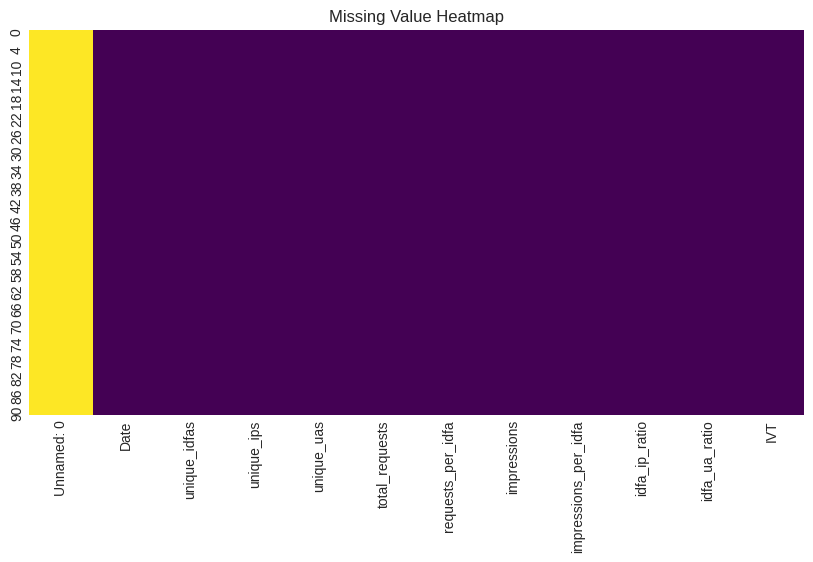

In [9]:
# Missing value count
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


In [10]:
# Numeric summary
display(df.describe().T)

# IVT insights
print(f"\nAverage IVT: {df['IVT'].mean():.4f}")
print(f"Median IVT: {df['IVT'].median():.4f}")
print(f"Std Dev IVT: {df['IVT'].std():.4f}")

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,89,2025-09-13 07:04:43.146067200,2025-09-11 00:00:00,2025-09-12 10:00:00,2025-09-13 07:00:00,2025-09-14 04:00:00,2025-09-15 01:00:00,NaN
unique_idfas,89.0,35829.438202,3535.0,9124.0,13737.0,21007.0,515646.0,79492.622092
unique_ips,89.0,35818.696629,3535.0,9124.0,13737.0,21003.0,515307.0,79442.196794
unique_uas,89.0,19.337079,17.0,18.0,19.0,20.0,26.0,1.888625
total_requests,89.0,39791.05618,3577.0,9506.0,13952.0,22285.0,649515.0,96001.660462
requests_per_idfa,89.0,1.037741,1.004514,1.013402,1.028068,1.045721,1.259614,0.037959
impressions,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
impressions_per_idfa,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
idfa_ip_ratio,89.0,1.000064,1.0,1.0,1.0,1.000075,1.000658,0.000128



Average IVT: 0.0043
Median IVT: 0.0043
Std Dev IVT: 0.0042


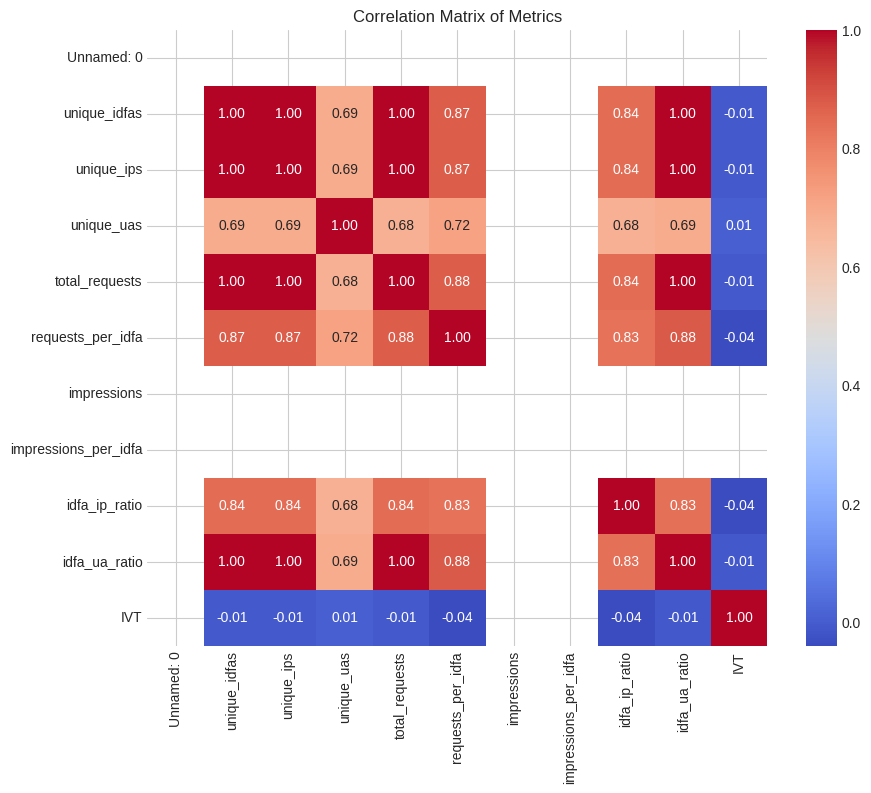


Top correlations with IVT:
 IVT                     1.000000
unique_uas              0.006076
unique_idfas           -0.006886
unique_ips             -0.006892
total_requests         -0.007053
idfa_ua_ratio          -0.010465
idfa_ip_ratio          -0.037178
requests_per_idfa      -0.039605
Unnamed: 0                   NaN
impressions                  NaN
impressions_per_idfa         NaN
Name: IVT, dtype: float64


In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Metrics")
plt.show()

# Highlight top correlations with IVT
corr_with_ivt = df.corr(numeric_only=True)['IVT'].sort_values(ascending=False)
print("\nTop correlations with IVT:\n", corr_with_ivt)

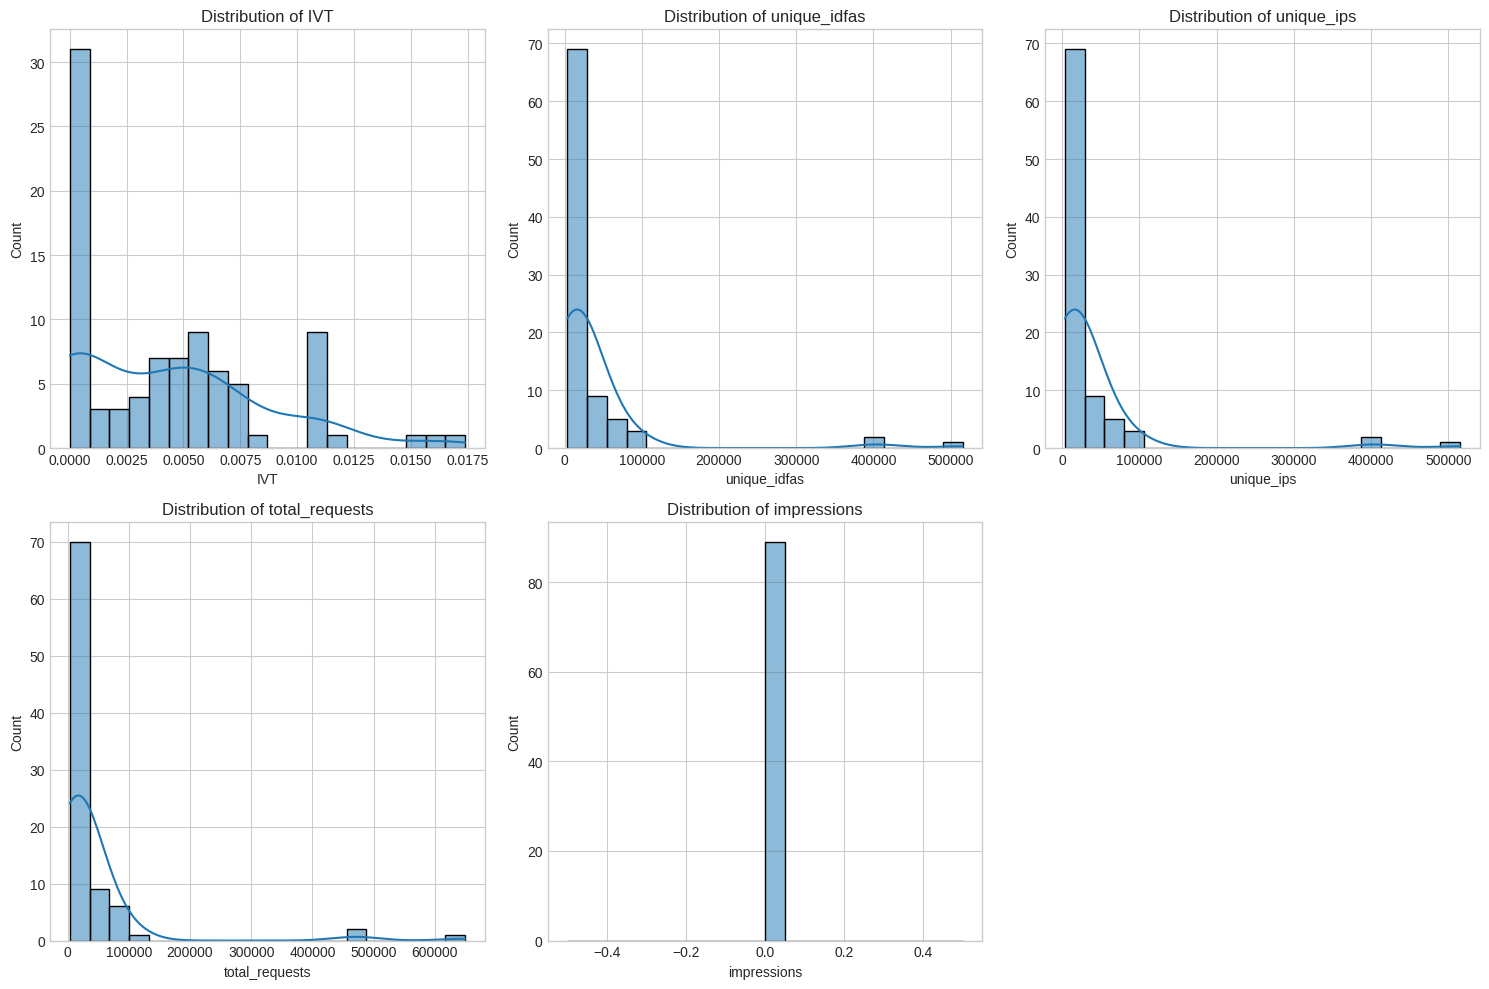

In [12]:
cols_to_plot = ['IVT', 'unique_idfas', 'unique_ips', 'total_requests', 'impressions']

plt.figure(figsize=(15,10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


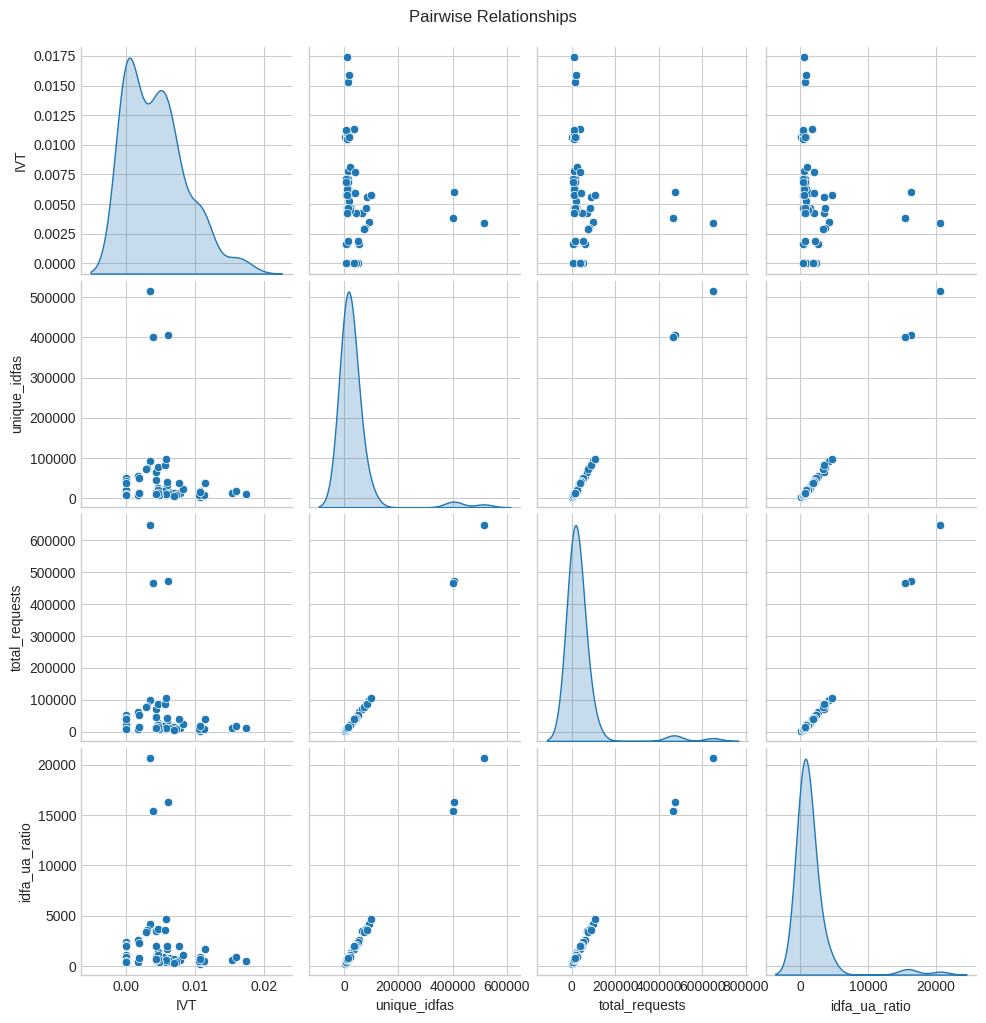

In [13]:
sns.pairplot(df[['IVT', 'unique_idfas', 'total_requests', 'idfa_ua_ratio']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

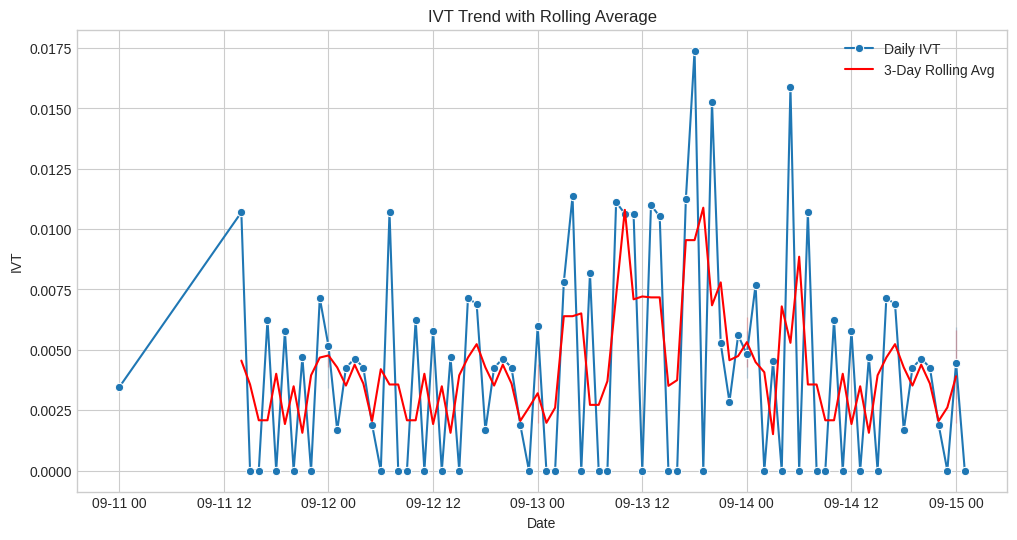

In [16]:
# Rolling mean to detect unusual spikes
df['IVT_RollingMean'] = df['IVT'].rolling(window=3, center=True).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='IVT', label='Daily IVT', marker='o')
sns.lineplot(data=df, x='Date', y='IVT_RollingMean', label='3-Day Rolling Avg', color='red')
plt.title("IVT Trend with Rolling Average")
plt.legend()
plt.show()

In [15]:
print("\n Quick Insights:")
print(f"- Dataset covers {df['Date'].min().strftime('%d %b %Y')} to {df['Date'].max().strftime('%d %b %Y')}")
print(f"- Mean IVT: {df['IVT'].mean():.4f}")
print(f"- Highest IVT: {df['IVT'].max():.4f} on {max_ivt_date}")
print(f"- Correlation between IVT and total requests: {df['IVT'].corr(df['total_requests']):.3f}")
print(f"- Correlation between IVT and idfa_ua_ratio: {df['IVT'].corr(df['idfa_ua_ratio']):.3f}")


 Quick Insights:
- Dataset covers 11 Sep 2025 to 15 Sep 2025
- Mean IVT: 0.0043
- Highest IVT: 0.0174 on 13 Sep 2025
- Correlation between IVT and total requests: -0.007
- Correlation between IVT and idfa_ua_ratio: -0.010
